#**1장 감성 분류하기**

In [ ]:
# 예시 텍스트로 감성 분류하기

text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [ ]:
# 파이프라인 객체 만들기

from transformers import pipeline

classifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


각 파이프라인은 텍스트 문자열을 입력으로 받고 예측 리스트를 반환한다

In [ ]:
# 예측 만들기

import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


감성 분석 작업에서 파이프라인은 POSITIVE와 NEGATIVE 레이블 중 하나를 반환

# **NER 적용하기**

In [ ]:
# 개체명 인식

ner_tagger = pipeline('ner', aggregation_strategy='simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511






* 이 파이프라인은 모든 개체명을 감지하고 ORG, LOC, PER 같은 카테고리에 할당


* 모델 예측에 따라 단어를 그룹화하기 위해 aggregation_strategy 매개변수 사용


* 점수는 모델이 개체명을 얼마나 확신하는지 나타냄


* word열의 ##는 모델의 토크나이저가 생성한 것임  


* 토크나이저는 단어를 토큰이라는 기본 단위로 분할한다

# **질문 답변하기**

텍스트 구절과 함께 답을 얻고 싶은 질문을 모델에 전달하고, 모델은 답변 텍스트를 반환

In [ ]:
reader = pipeline('question-answering')
question = 'What does the customer want?'
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


*  파이프라인은 답이 위치한 문자 인덱스에 해당하는 start와 end 정수도 반환


*   여기서는 텍스트에서 직접 답변을 추출하기 때문에 ‘추출적 질문 답변’

# **텍스트 요약**

긴 텍스트를 입력으로 받고 관련 사실이 모두 포함된 간단한 버전을 생성하는 것을 목표로 함

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=60, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand


*  모델이 문제의 핵심을 감지하고 'Bumblebee'가 불만을 제기한 사람이라는 것을 정확히 구분 중


*  파이프 라인에서 max_length와 clean_up_tokenization_spaces 키워드 매개변수를 사용


*  매개변수를 통해 실행 시점에 출력을 조정

# **번역**

In [ ]:
!pip install sentencepiece
translator = pipeline("translation_en_to_de",
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


*  파이프라인의 기본 모델을 오버라이드해서 애플리케이션에 가장 잘 맞는 모델을 선택하는 방법을 보여준다

# **2장 텍스트 생성**

일종의 자동 완성 기능

In [ ]:
from transformers import set_seed
set_seed(42) # 동일 결과를 재현하기 위해 지정

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. You have requested a new Transformers 2 action figure and the Optimus Prime action figure I received on June 17 was not a part of this purchase. After receiving your gift, I have decided to call and request a new Transformers 2 action figure, or even a new Hasbro action figure. I can confirm that in order to resolve these issues,


# **데이터셋**

분노, 혐오, 두려움, 기쁨, 슬픔, 놀람의 여섯 개의 감정으로 나뉘는 데이터셋 활용

## **예제**

허깅페이스 데이터셋으로 데이터를 로드하고 확인하는 방법 알아보기

In [ ]:
# 코랩용
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=2)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 15 (delta 8), pack-reused 569
Receiving objects: 100% (653/653), 62.41 MiB | 21.18 MiB/s, done.
Resolving deltas: 100% (335/335), done.
/content/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.35.2
Using datasets v2.16.1
Using accelerate v0.26.1
Using sentencepiece v0.1.99
Using umap v0.5.5
No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.


In [ ]:
from datasets import list_datasets

# list_datasets() 함수 - 허브에서 제공하는 데이터셋 목록 출력
all_datasets = list_datasets()
print(f'현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.')
print(f'처음 10개 데이터셋: {all_datasets[:10]}')

<ipython-input-11-23ed940bb559>:4: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


현재 허브에는 98004개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']


In [ ]:
# emotion 데이터셋 로드
from datasets import load_dataset

#emotions = load_dataset("SetFit/emotion")

emotions = load_dataset('emotion')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

**주의!**


SetFit/emotion의 label 특성은 ClassLabel 객체가 아니므로 수동으로 ClassLabel 객체를 만들어야한다

In [ ]:
#from datasets import ClassLabel

#emotions['train'].features['label'] = ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [ ]:
# emotions 객체 출력
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

이 객체는 파이썬 딕셔너리와 유사함

각 키는 다른 분할에 상응하며, 일반적인 딕셔너리 사용법으로 개별 분할 참조 가능

In [ ]:
# Dataset의 클래스 객체를 반환
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
# 평범한 파이썬 배열이나 리스트처럼 동작하므로 len으로 길이 확인from datasets import ClassLabel
len(train_ds)

16000

In [ ]:
# 인덱스로 개별 샘플 참조
# 한 개의 행이 하나의 딕셔너리로 표현됨
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
# 키는 열 이름에 해당한다.
train_ds.column_names

['text', 'label']

* 딕셔너리의 값은 트윗과 감정에 해당한다


* 허깅페이스 데이터셋은 Apache Arrow 기반


* Apache Arrow : 효율적인 열기반 포맷(Parquet) 사용


* Parquet(파케이) :  하둡에서 column 방식으로 저장하는 저장포맷


* 하둡 : 빅데이터를 분할하여 저장하고 처리하기 위한 소프트웨어

In [ ]:
# 사용 중인 데이터 타입은 Dataset 객체의 features 속성에 표시
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness',
'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


**Q. 교재랑 다르게 나옴 왜지???**


A. 아~~ 교재와 달리 나는 수동으로 ClassLabel 객체를 만들어서 그런 듯 스터디에서 물어보기

아무튼 label 열은 클래스 이름과 정수 매핑에 대한 정보가 담긴 ClassLabel 객체

In [ ]:
# slice 사용시 몇 개의 행이 선택됨
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3]}


이 경우 딕셔너리 값이 개별 항목이 되지 않고 리스트로 묶인다

In [ ]:
# 이름으로 특정 열 지정 가능
print(train_ds['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned
hopeful just from being around someone who cares and is awake', 'im grabbing a
minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the
fireplace i will know that it is still on the property', 'i am feeling grouchy']


#**데이터셋에서 데이터프레임으로**

Dataset 객체를 판다스 DataFrame으로 변환하기

In [ ]:
# 허깅페이스의 set_format() 메소드 - 출력 포맷 변경
import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()  #pandas의 head 메소드 - 맨 앞 5개 보여줌

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


 내부 데이터 포맷인 Apache Arrow 테이블은 바뀌지 않으므로 필요에 따라 다른 포맷으로 변환 가능하다

레이블이 정수로 출력되므로 features 속성(위에서 사용중인 데이터 타입을 보여준댔음)으로 label 열을 선택한 후  
int2str() 메소드로 레이블 이름에 해당하는 새로운 열 추가하기

In [ ]:
# class 확인
emotions["train"].features['label'].__class__

datasets.features.features.ClassLabel

수정사항대로 하면 class가 ClassLabel이 아닌 Value로 뜬다  
그래서 아래의 int2str() 메소드를 사용할 수 없게됨 >> 수동으로 만들었는데 왜 쓸 수 없는거지 ??

In [ ]:
# label name 추가
# int2str() 메소드 - 정수 레이블을 클래스 이름으로 바꿔줌
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# **클래스 분포 살펴보기**

클래스 분포가 편향된 데이터셋을 확인하기 위해 판다스와 맷플롯립을 이용하여 시각화하기

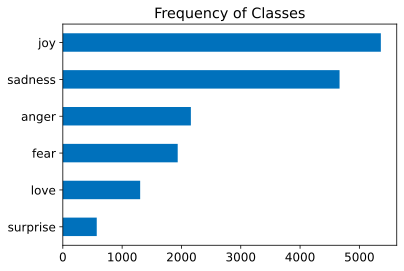

In [ ]:
# value_counts() 메소드 - 고유값의 개수 카운팅
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()  # ascending=True : 오름차순
plt.title('Frequency of Classes')
plt.show()

딱 봐도 불균형이 심함

### **불균형한 데이터를 다루는 방법**

* 소수 클래스를 랜덤하게 오버샘플링하기


* 다수 클래스를 랜덤하게 언더샘플링하기


* 클래스의 대표성이 부족하다면 레이블된 데이터를 더 많이 수집하기


+) 일반적으로 훈련 세트에만 샘플링 전략을 사용한다

# **트윗 길이 확인**

**트랜스포머 모델은 `최대 문맥 크기`라는 최대 입력 시퀀스 길이가 있다**


예를 들면, DistilBERT의 maximum context size는 512 토큰이다.  
+) 토큰 : 텍스트의 기본 단위

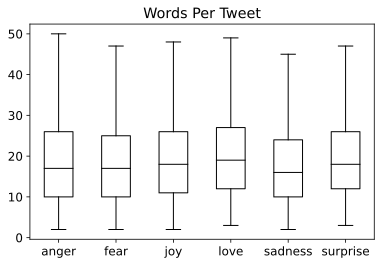

In [ ]:
# 트윗당 단어 분포로 감정에 따른 트윗 길이 추정하기
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name',  showfliers=False, color='black')

plt.suptitle('')
plt.xlabel('')
plt.grid(False)  # 교재랑 달리 에러나서 따로 빼줬음
plt.show()

텍스트가 모델의 문맥 크기보다 길면 잘라내야 하는데,   
예제에서는 평균 15개 단어 정도로 가장 긴 트윗도 DistilBERT의 최대 문맥 크기보다 작으므로 문제 X

In [ ]:
# DataFrame 포맷 다 썼으므로 데이터셋의 출력 포맷 초기화하기
emotions.reset_format()

# **텍스트에서 토큰으로**

원시 텍스트를 HuggingFace transformers에 적합한 포맷으로 변환하는 방법 알아보기

### **문자 토큰화**

각 문자를 개별로 모델에 주입하는 것

In [ ]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


각 문자(토큰)을 고유한 정수로 바꾸는 매핑 딕셔너리 만들기

In [ ]:
# 수치화하기 : 각 문자를 고유한 정수로 인코딩
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


In [ ]:
# 토큰화된 텍스트를 정수 리스트로 변환하기
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


input_ids를 one_hot vector의 2D 텐서로 바꾸기

**one-hot vector?**


머신 러닝에서 순서형(ordinal) 또는 명목형(nominal)범주 데이터를 인코딩하기 위해 자주 사용된다

In [ ]:
# 각 이름을 고유한 아이디로 매핑
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


이 경우 이름 사이에 가상의 순서가 만들어짐

따라서 이 대신 범주마다 새 열을 만들어 이름이 범주에 해당하면 1, 그렇지 않으면 0을 할당하기

In [ ]:
# get_dummies() 함수 이용
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


**이 DataFrame의 행이 *one_hot vector*이다**


: 하나의 항목만 1이고 나머지는 0

In [ ]:
# 원-핫 인코딩 만들기
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)  # 파이토치로 input_ids 텐서로 바꾸기
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

38개의 입력 토큰에 각각에 20차원의 원-핫 벡터 생성


: 어휘사전을 구성하는 고유한 문자가 20개기 때문

***주의!***


one_hot() 함수에 항상 num_classes 매개변수를 지정해야함


그렇지 않으면 원-핫 벡터가 어휘사전 길이보다 더 짧아짐

In [ ]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


#**단어 토큰화**

텍스트의 일부 구조가 유지되는 토큰화이다. 방식은 문자 토큰화와 유사하나 훈련 과정의 복잡도가 감소

In [ ]:
# 공백을 이용해 토큰화하기 그 뒤로는 앞이랑 똑같음
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


###**문제**

구두점이 고려되지 않아 NLP.이 하나의 토큰으로 처리되는 문제가 발생!  


이는 결과적으로 어휘사전이 수백만 개까지 늘어나는 더 큰 문제를 야기함  


: 모델이 너무 커진다

#**부분단어 토큰화**

그래서 문자 토큰화와 단어 토큰화를 절충한 것이 부분단어 토큰화이다

*  드물게 등장하는 단어 : 더 작은 단위로 나눠 처리


*  자주 등장하는 단어 : 입력 크기를 적절한 크기로 유지하기 위해 단어를 고유한 항목으로 유지

통계 규칙 + 알고리즘을 함께 사용하여 사전 훈련 말뭉치에서 학습함

### **WordPiece 작동 방식**

허깅페이스 트랜스포머스가 제공하는 AutoTokenizer 클래스의 from_pretained() 메소드를 허브의 모델 ID / 로컬 파일 경로와 함께 호출하기

**AutoTokenizer**


AutoTokenizer 클래스는 체크포인트 이름을 사용해 모델의 설정, 사전 훈련된 가중치, 어휘 사전을 자동으로 추출하는 자동 클래스

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)  # ckpt: 체크포인트

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

토크나이저가 어떻게 동작하는지 확인하기

In [ ]:
# 단어가 input_ids 필드의 고유한 정수에 매핑됨
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
# convert_ids_to_tokens() 메소드로 이를 다시 토큰으로 변환하기
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


**1. 특수 토큰 [CLS], [SEP]이 시퀀스 처음과 끝에 추가**  
: 시퀀스의 시작과 끝을 알린다


**2. 토큰이 모두 소문자로 변환**  
: 이는 체크포인트의 특징이다


**3. tokenizing과 NLP가 각각 두 개의 토큰으로 나뉨**  
: 자주 등장하는 단어가 아니기 때문. ##izing의 #는 앞의 문자열이 공백이 아님을 뜻함

In [ ]:
# convert_tokens_to_string() 메소드 - 문자열로 다시 바꾸기
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


'##' 가 붙은 토큰이 다시 하나로 합쳐진 것을 확인할 수 있다

In [ ]:
# 어휘사전 크기
tokenizer.vocab_size

30522

In [ ]:
# 모델의 최대 문맥 크기
tokenizer.model_max_length

512

In [ ]:
# 모델이 순전파에서 기대하는 필드 이름
tokenizer.model_input_names

['input_ids', 'attention_mask']

# **전체 데이터셋 토큰화하기**

전체 말뭉치를 토큰화하기 위해 DatasetDict 객체의 map() 메소드 사용하기

In [ ]:
# 샘플을 토큰화할 처리 함수 만들기
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

* padding=True : 배치에 있는 가장 긴 샘플 크기에 맞춰 0으로 패딩


* truncation=True : 최대 문맥 크기에 맞춰 샘플을 잘라냄

In [ ]:
# tokenize() 동작 확인
print(tokenize(emotions['train'][:2]))  # 샘플 두 개 선택해 전달

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


In [ ]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


토크나이저가 인코딩된 트윗을 input_ids로 반환하고, attention_mask 배열 리스트도 반환한다


: 추가된 패딩 토큰 때문에 모델이 혼동하지 않게 하려는 조치이다

어텐션 마스크는 모델이 입력 텐서에서 패딩 영역을 무시하는데 사용

In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)  # batch_size=None : 전체 데이터셋이 하나의 배치로 함수에 적용

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

이 연산이 데이터셋에 input_ids와 attention_mask 열을 새로 추가하는 것을 확인 가능하다

In [ ]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


#**텍스트 분류 모델 훈련하기**

DistilBERT 같은 모델은 마스킹된 단어를 예측하도록 사전 훈련되지만 이런 언어 모델을 바로 텍스트 분류에 사용할 수 없고 수정을 거쳐야한다

* 방법1 : **특성 추출**  
사전 훈련된 모델을 수정하지 않고 은닉 상태를 특성으로 사용하여 훈련하기


* 방법2 : **미세 튜닝**  
사전 훈련된 모델의 파라미터도 업데이트하기 위해 전체 모델을 엔드-투-엔드로 훈련하기

##**1. 트랜스포머를 특성 추출기로 사용하기**

훈련하는 동안 바디의 가중치를 **동결**하고 은닉 상태를 분류 모델의 특성으로 사용한다

### **사전 훈련된 모델 사용하기**

**AutoModel**

AutoModel 클래스는 토큰 인코딩을 임베딩으로 변환한 다음 인코더 스택에 통과시켜 은닉상태를 반환한다.

In [ ]:
# AutoModel 클래스는 AutoTokenizer 클래스와 유사
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"  # ckpt 로드
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

말뭉치에서 이런 상태를 어떻게 추출할까?

###**마지막 은닉 상태 추출하기**

문자열 인코딩 후 토큰을 파이토치 텐서로 변환

* 인코딩 : 사람의 문자를 컴퓨터가 이해하는 코드로 바꿔주는 것

In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")  # pt; 파이토치, tf: 텐서플로
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


결과 텐서의 크기는 [batch_size, n_tokens] 이다.

인코딩을 텐서로 준비했으므로 마지막 단계에서 이를 모델이 있는 장치로 옮기고 입력으로 전달한다

In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():  # 그래디언트 자동 계산 비활성화
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]),
hidden_states=None, attentions=None)


In [ ]:
# 은닉 상태의 크기 확인
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

은닉 상태 텐서의 크기는 [batch_size, n_tokens, hidden_dim] 이다.  

: 즉, 6개의 입력 토큰마다 768차원의 벡터가 반환되었다는 것



* hidden dim : 은닉층의 뉴런 개수


분류 작업에서는 시퀀스 시작에 등장하는 [CLS] 토큰에 연관된 은닉 상태를 입력 특성으로 사용

In [ ]:
# 인덱스를 지정해 추출
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

###**hidden_state 열을 만들어 이런 벡터를 모두 저장하기**

앞에서 수행한 작업을 하나의 함수로 만들기

In [ ]:
def extract_hidden_states(batch):
    # 모델 입력을 GPU로 옮깁니다.
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # 마지막 은닉 상태를 추출합니다.
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] 토큰에 대한 벡터를 반환합니다.
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}  # cpu로 다시 가져와 넘파이 ㄱㄱ

In [ ]:
# torch 포맷으로 바꾸기
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
# map() 메소드로 은닉 상태 한 번에 추출하기
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

extract_hidden_states 함수 적용을 통해 hidden_state 열이 데이터셋에 새로 생긴 것을 볼 수 있음

In [ ]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

###**특성 행렬 만들기**

은닉 상태를 입력 특성으로, 레이블을 타깃으로 사용하기

In [ ]:
# 사이킷런 st
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

###**훈련 세트 시각화하기**

은닉 상태로 모델을 훈련하기 전에 분류하려는 감정에 대한 유용한 표현을 제공하는지 시각화로 확인하기

In [ ]:
# UMAP 알고리즘으로 벡터를 2D로 투영하기
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler  # sklearn: 사이킷런

# 특성 스케일을 [0,1] 범위로 조정하기 >> 그래야 잘 돌아가서
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련시키기
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# 2D 임베딩의 데이터프레임을 만들기 >> 은닉 상태의 차원 축소
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.633555,6.245492,0
1,-2.983438,5.939547,0
2,5.252456,2.738498,3
3,-2.457133,3.781064,2
4,-3.402172,4.036854,3


출력 결과 특성이 768개에서 2개로 압축된 것을 확인할 수 있음

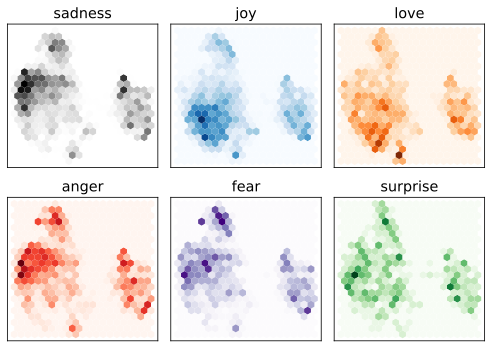

In [ ]:
# 각 범주에 대한 샘플의 밀도를 개별로 그리기
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap = cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

데이터셋의 특성 파악 완.

###**간단한 분류 모델 훈련하기**

은닉 상태를 사용해 사이킷런의 로지스틱 회귀모델 훈련하기

In [ ]:
from sklearn.linear_model import LogisticRegression

# 수렴을 보장하기 위해 'max_iter'를 증가시키기
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

* max_iter : 반복(iteration)은 몇 개의 배치(batch)를 사용할 것인지를 의미한다


In [ ]:
# 기존 모델과 성능 비교해보기
from sklearn.dummy import DummyClassifier

# 항상 다수 클래스를 예측하는 모델 만들기
dummy_clf = DummyClassifier(strategy="most_frequent")

# 만약 랜덤으로 예측하는 모델을 만들려면
# dummy_clf = DummyClassifier(strategy="uniform") : 이 경우 감정이 6개이므로 약 16.5%

dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

따라서 DistilBERT 임베딩을 사용한 분류 모델은 기존보다 뛰어남!

###**오차 행렬**

confusion matrix는 진짜 레이블과 예측 레이블의 관계를 보여준다

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

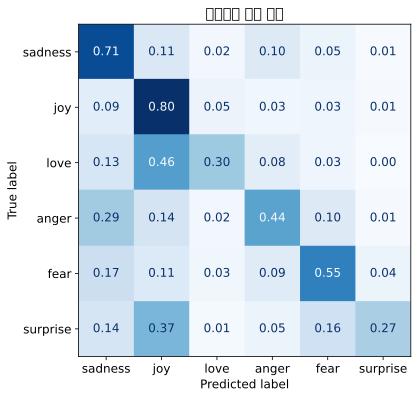

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("정규화된 오차 행렬")  # 아 이거 한글로 바꿨더니 출력에서 이상해짐
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

anger와 fear은 sadness와 가장 많이 혼동, love와 surprise는 joy로 많이 혼동됨


: 임베딩을 시각화했을 때와 일치한다

##**2. 트랜스포머 fine_tuning하기**

미세 튜닝 방식에서는 은닉 상태를 고정된 특성으로 사용하지 않고 전체 모델을 훈련한다

: 분류 모델에 입력으로 사용되는 은닉 상태를 훈련하면 적합하지 않은 데이터를 거를 수 있음

이를 위해 분류 헤드는 미분 가능해야하며 일반적으로 신경망으로 분류 작업을 수행한다

###**사전 훈련된 모델 로드하기**

**AutoModelForSequenceClassification**


사전 훈련된 모델 출력 위에 베이스 모델(사전 훈련된 DistilBERT)과 함께  
쉽게 훈련할 수 있는 분류 헤드가 있다는 점에서 AutoModel 클래스와 다르다

In [ ]:
# 분류 헤드의 출력 크기를 설정하기 위해
from transformers import AutoModelForSequenceClassification

# 모델이 예측할 레이블 개수(6) 지정하기
num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

###**성공 지표 정의하기**

훈련하는 동안 성능을 모니터링하기 위해 Trainer에 사용할 compute_metrics() 함수 정의하기

이 함수는 EvalPrediction 객체를 입력받아 측정 지표 이름과 값을 매핑한 딕셔너리를 반환한다

In [ ]:
# f1 점수와 정확도 계산
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

###**모델 훈련하기**

Trainer 클래스를 정의하기 앞서 허깅페이스 허브에 로그인해서 access token 만들어서 입력해줘야함

In [ ]:
# access token은 write용이어야함 >> sschoi 사용
from huggingface_hub import notebook_login

notebook_login()

훈련 파라미터를 정의하기 위해 TrainingArguments 클래스 사용하기

In [ ]:
!pip install transformers[torch]
!pip install accelerate -U

from transformers import Trainer, TrainingArguments

# 배치 크기, 학습률, epoch 횟수 설정
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",  # 자동 로드를 위해 evaluation_strategy와 동일한 매개변수 지정
                                  load_best_model_at_end=True,  # 훈련 후 최상의 모델을 로드하도록 지정
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.849900,0.335101,0.904000,0.902670
2,0.258900,0.222624,0.924000,0.923426


TrainOutput(global_step=500, training_loss=0.5544324340820312, metrics={'train_runtime': 14709.9572, 'train_samples_per_second': 2.175, 'train_steps_per_second': 0.034, 'total_flos': 720342861696000.0, 'train_loss': 0.5544324340820312, 'epoch': 2.0})

특성 기반 방식보다 성능 굿

###**오차 행렬 만들기**

먼저 검증 세트에 대한 예측 만들기

In [ ]:
# Trainer 클래스의 predict() 메소드는 평가에 사용할 수 있는 몇 가지 객체를 반환
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
# 검증 세트에 대한 지표
preds_output.metrics

{'test_loss': 0.22262397408485413,
 'test_accuracy': 0.924,
 'test_f1': 0.9234261031175792,
 'test_runtime': 253.2141,
 'test_samples_per_second': 7.898,
 'test_steps_per_second': 0.126}

각 클래스에 대한 예측 데이터를 np.argmax()를 이용해 예측을 디코딩하기

In [ ]:
# np.argmax() 함수 - 주어진 numpy 배열에서 가장 높은 값을 가진 값의 인덱스 반환
y_preds = np.argmax(preds_output.predictions, axis=1)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

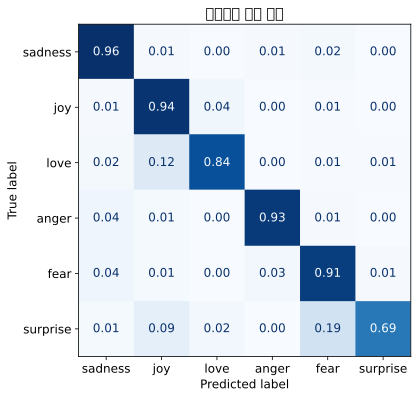

In [ ]:
# 위의 예측을 사용해 오차 행렬 만들기 >> 위에서 title 한글로 바꿔서 결과 요상한 것임
plot_confusion_matrix(y_preds, y_valid, labels)

이 오차 행렬은 주대각선 원소 외에는 거의 0에 가까워 이상적이라 볼 수 있다

###**오류분석**

모델의 손실 기준으로 검증 샘플을 정렬하는 방법 사용한다


순전파(forward pass)의 결과와 레이블을 사용하면 손실은 자동으로 계산 가능

In [ ]:
# 손실과 예측 레이블을 반환하는 함수 정의
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동시키기
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮기기 >> 난 이미 cpu긴 함
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

다시 한 번 map() 메소드로 이 함수를 적용하여 모든 샘플의 loss 구하기

In [ ]:
# 데이터셋을 다시 파이토치 텐서로 변환하기
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# loss 값 계산하기
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

마지막으로 DataFrame 만들기

In [ ]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

#**잘못된 레이블**

emotion_emcoded를 loss 기준으로 오름차순이나 내림차순으로 정렬한다

: 이는 잘못 레이블링된 샘플을 빠르게 찾아 수정할 수 있게 한다

###**데이터셋의 특이사항**

실세계의 데이터셋은 요상하기 마련이다

In [ ]:
# 내림차순(False)으로 정렬하여 loss가 가장 높은 샘플 확인하기
df_test.sort_values("loss", ascending=False).head(10)  # 맨 앞 10개까지 출력

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.446919
882,i feel badly about reneging on my commitment t...,love,sadness,5.381267
1801,i feel that he was being overshadowed by the s...,love,sadness,5.370357
465,i would eventually go in to these stores but i...,joy,fear,5.221723
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.179872
1274,i am going to several holiday parties and i ca...,joy,sadness,4.883377
1509,i guess this is a memoir so it feels like that...,joy,fear,4.871017
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.742721
765,i feel super awkward and out of place right now,joy,sadness,4.584977
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.476331


모델이 일부 레이블을 잘못 예측하였음

: 이를 바탕으로 데이터셋을 정제하면 성능이 크게 향상된다

In [89]:
# 오름차순(True)으로 정렬하여 loss가 가장 낮은 예측 확인하기
df_test.sort_values("loss", ascending=True).head(10)  # 맨 앞 10개까지 출력

,text,label,predicted_label,loss
702,i only find out that they are looking and feel...,joy,joy,0.018541
1523,i dont give a fuck because i feel like i canno...,joy,joy,0.018992
934,i feel a positive responsibility to see this t...,joy,joy,0.018994
1050,i feel like our society has programmed little ...,joy,joy,0.019221
1589,i feel a strong shift recently,joy,joy,0.019272
1391,i tell myself i dont open my mouth and say wha...,joy,joy,0.019299
350,i feel its hardly a loss since the food at kao...,joy,joy,0.019332
578,i got to christmas feeling positive about the ...,joy,joy,0.019438
121,i love for my girls to have an imagination and...,joy,joy,0.019446
1263,i feel this way about blake lively,joy,joy,0.019477


책의 예제는 sadeness가 가장 확신하는 예측인데 내 결과는 joy,  
예제 코딩도 그런걸 보니 아마 감정들이 유의미한 차이없이 정확도가 높은 편이라 그런게 아닐까 싶음

###**모델 저장 및 공유**

In [ ]:
# 모델을 허브에 업로드
trainer.push_to_hub(commit_message="Training completed!")

CommitInfo(commit_url='https://huggingface.co/ssunho1/distilbert-base-uncased-finetuned-emotion/commit/4ae928feef052c8da583232a69acf5fc06be9f26', commit_message='Training completed!', commit_description='', oid='4ae928feef052c8da583232a69acf5fc06be9f26', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# pipeline() 함수 사용 위해 파이프라인 만들기
from transformers import pipeline

# 내 허브 사용자 이름인 ssunho1 넣기
model_id = "ssunho1/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [92]:
# 샘플 트윗으로 파이프라인 테스트하기
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, top_k=None)

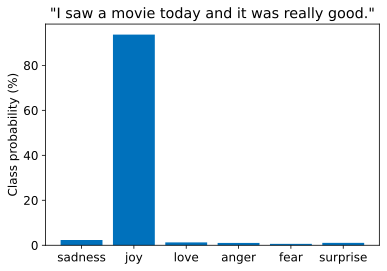

In [93]:
# 각 클래스의 확률을 bar 그래프로 나타내기
preds_sorted = sorted(preds, key=lambda d: d['label'])
preds_df = pd.DataFrame(preds_sorted)
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

이 모델은 가장 가능성 있는 클래스를 joy로 추정 중!